# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv( 'affair_data.csv' )
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [16]:
data.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [85]:
X = pd.get_dummies(data, columns = ['occupation', 'occupation_husb', 'religious'])
del X['affair']

In [86]:
Y = data['affair']

In [87]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [89]:
x_train.shape, data.shape, x_test.shape

((4456, 21), (6366, 9), (1910, 21))

Обучаем модель

In [90]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [91]:
predictions = model.predict(x_test)

In [92]:
model.score(x_test, y_test)

0.7298429319371728

### Упражнение

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [93]:
def get_model_score(random):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = random)
    model.fit(x_train, y_train)
    predictions = model.predict_proba(x_test)
    return model.score(x_test, y_test)
    


In [94]:
for random in range(10):
    print(random, get_model_score(random))

0 0.7298429319371728
1 0.7329842931937173
2 0.7198952879581152
3 0.7204188481675393
4 0.7115183246073299
5 0.724607329842932
6 0.7115183246073299
7 0.7361256544502618
8 0.7240837696335078
9 0.7178010471204188


### Оценка качества модели

Считаем accuracy последней модели

In [95]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( x_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):
    if predicted_prob >= 0.5:
        pred = 1
    else:
        pred = 0
    if actual == 1:
        if pred == 1:
            tp += 1
        else:
            fp += 1
    else:
        if pred == 0:
            tn += 1
        else:
            fn += 1
print('true positive = {}, true negative = {}, false positive = {}, false negative = {}'.format(tp, tn, fp, fn))

true positive = 240, true negative = 1151, false positive = 367, false negative = 152


In [96]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7282722513089005

In [97]:
precision = tp / (tp + fp)
precision

0.3953871499176277

### Используем готовые библиотеки

In [98]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [99]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [100]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.3240790176187934, 1.0, 0.059621858601535294)
(0.32371794871794873, 0.9983525535420099, 0.05970361934138987)
(0.3238909673971138, 0.9983525535420099, 0.06022844630834121)
(0.3240641711229946, 0.9983525535420099, 0.060239524728703385)
(0.32423756019261635, 0.9983525535420099, 0.0604092629081416)
(0.3238758029978587, 0.9967051070840197, 0.060409391727778136)
(0.32404927691483665, 0.9967051070840197, 0.061197082772667534)
(0.32439678284182305, 0.9967051070840197, 0.06132143599487313)
(0.32457081545064376, 0.9967051070840197, 0.06189035530799213)
(0.3247450348899624, 0.9967051070840197, 0.06286124594732267)
(0.3249194414607948, 0.9967051070840197, 0.06324352844476777)
(0.3245566899516389, 0.9950576606260296, 0.06359234163257865)
(0.3247311827956989, 0.9950576606260296, 0.06377969755676964)
(0.32490586336740185, 0.9950576606260296, 0.06393175428686775)
(0.32508073196986004, 0.9950576606260296, 0.06492949239402804)
(0.325255788906839, 0.9950576606260296, 0.06554648156087547)
(0.32543103448

(0.7454545454545455, 0.13509060955518945, 0.7190088716852374)
(0.7431192660550459, 0.13344316309719934, 0.7191616571436704)
(0.7407407407407407, 0.13179571663920922, 0.7221956668817094)
(0.7383177570093458, 0.1301482701812191, 0.7226383052282118)
(0.7452830188679245, 0.1301482701812191, 0.72653572621114)
(0.7428571428571429, 0.128500823723229, 0.7273470834774433)
(0.7403846153846154, 0.12685337726523888, 0.7276117507607684)
(0.7475728155339806, 0.12685337726523888, 0.7295962191466084)
(0.7450980392156863, 0.12520593080724876, 0.7302056238290896)
(0.7425742574257426, 0.12355848434925865, 0.7321528932767564)
(0.75, 0.12355848434925865, 0.7327303630152872)
(0.7575757575757576, 0.12355848434925865, 0.732844633161041)
(0.7551020408163265, 0.12191103789126853, 0.73341997351464)
(0.7525773195876289, 0.12026359143327842, 0.7338693905698791)
(0.75, 0.1186161449752883, 0.735438892334132)
(0.7473684210526316, 0.11696869851729819, 0.7361972168053833)
(0.7446808510638298, 0.11532125205930807, 0.737

In [101]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


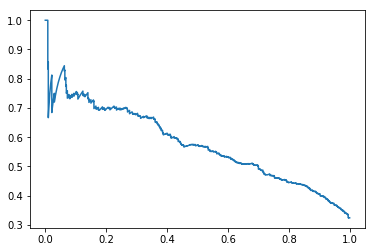

In [102]:
plt.plot( re, pr )

In [103]:
from sklearn.metrics import average_precision_score

In [104]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.5777400902370352

### ROC

In [105]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [106]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [107]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0016474464579901153, 0.9284688982121796)
(0.0, 0.008237232289950576, 0.903754256636225)
(0.0007674597083653108, 0.008237232289950576, 0.9000778799373941)
(0.0007674597083653108, 0.009884678747940691, 0.8967382623318145)
(0.0023023791250959325, 0.009884678747940691, 0.8922821462026986)
(0.0023023791250959325, 0.0214168039538715, 0.8660482836939696)
(0.004604758250191865, 0.0214168039538715, 0.8549656823313853)
(0.004604758250191865, 0.029654036243822075, 0.8480198183849668)
(0.005372217958557176, 0.029654036243822075, 0.8476396499574149)
(0.005372217958557176, 0.06260296540362438, 0.8054019680203033)
(0.0061396776669224865, 0.06260296540362438, 0.8052804988055187)
(0.0061396776669224865, 0.0642504118616145, 0.8048383531588084)
(0.007674597083653108, 0.0642504118616145, 0.8009687659418709)
(0.007674597083653108, 0.06754530477759473, 0.7989038182186393)
(0.00920951650038373, 0.06754530477759473, 0.7962045895093689)
(0.00920951650038373, 0.06919275123558484, 0.7956322814940244)
(0.

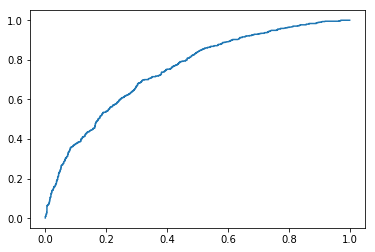

In [108]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [109]:
X = pd.get_dummies(data, columns = ['occupation', 'occupation_husb', 'religious'])

In [110]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [111]:
model2 = LogisticRegression()

In [112]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [113]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
predictions2 = model2.predict_proba( X_test_short )

In [115]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

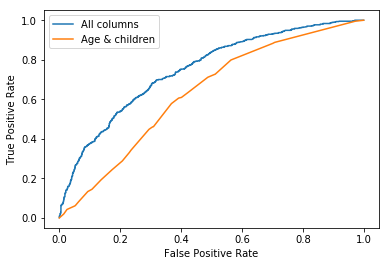

In [116]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [117]:
from sklearn.metrics import roc_auc_score

In [118]:
roc_auc_score( y_test, predictions[:, 1] )

0.7488409082575883

In [119]:
roc_auc_score( y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [120]:
from sklearn.metrics import auc

In [121]:
auc( fpr, tpr )

0.7488409082575883

In [122]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [123]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( x_train, y_train )
predictions = model1.predict_proba( x_test )

In [124]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( x_train, y_train )
predictions2 = model2.predict_proba( x_test )

In [125]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( x_train, y_train )
predictions3 = model3.predict_proba( x_test )

In [126]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

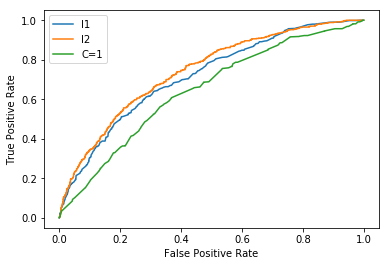

In [127]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [128]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [129]:
Y = data['affair']

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [131]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

In [132]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [133]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

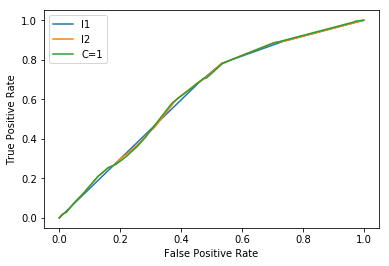

In [134]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()